Library Imports 

In [82]:
import pandas as pd
import numpy as np
#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Hold out / Grid / Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# Graphics tools 
import matplotlib.pyplot as plt
import seaborn as sns
# Web Service 
import fastapi as FastAPI 

# Utilizar o conjunto de dados Go To College para a determinação se um estudante irá continuar para a faculdade ou não

In [27]:
df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Challenges\defiance_01\data.csv')

In this problem we need to see if we can predict if a student will go to College or not, we don't have a large database, our datasate has 1000 values and 11 columns, here we will use the database "data.csv" that was made available to use, below you will see an analysis of the data, the processing of this data, and the use of Classifications models of machine learning to achieve our goa

Brief data analysis

In [28]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [29]:
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [30]:
# Check null values
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [31]:
# Data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


Exploratory Data Analysis (EDA):

Correletion between variables 

<AxesSubplot:>

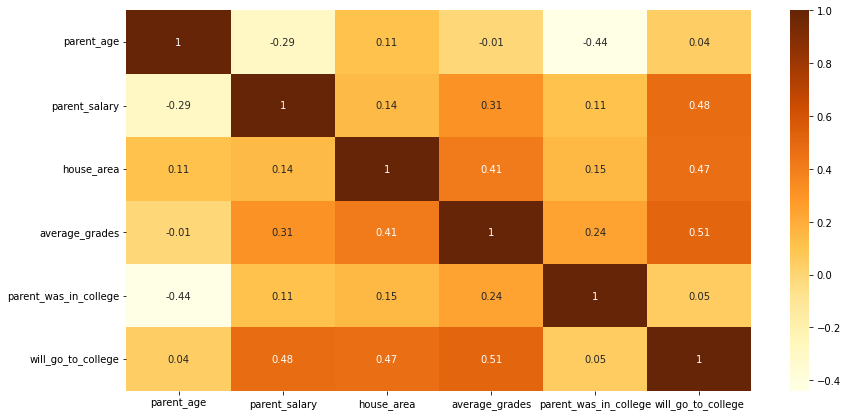

In [33]:
correletion = df.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(correletion, annot=True, cmap = 'YlOrBr')

We can analyze that the maximum correlation between the variables is up to 51%. Therefore, we can see that the house_area, parent_salary and average_grades variables have a correlation of around 50% with the target variable of our problem.

Confusion Matrix relation :

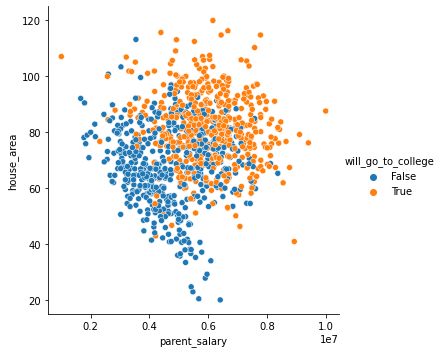

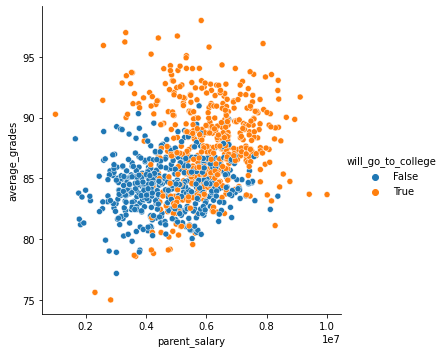

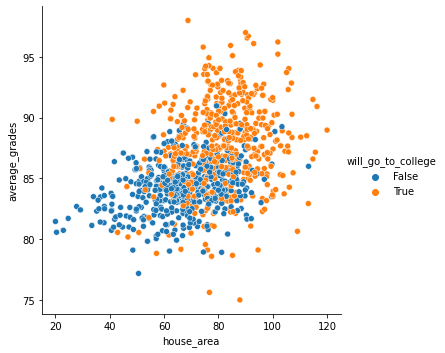

In [47]:
sns.relplot(x='parent_salary', y = 'house_area', hue = "will_go_to_college", data = df)
sns.relplot(x='parent_salary', y = 'average_grades', hue = "will_go_to_college", data = df)
sns.relplot(x='house_area', y = 'average_grades', hue = "will_go_to_college", data = df)

Analyzing each variable and comparing it with our target, we can be sure and clarify the information taken beforehand in the confusion matrix. Students who have a higher House_area, Parent_Salary and Average_grades are more likely to go to college

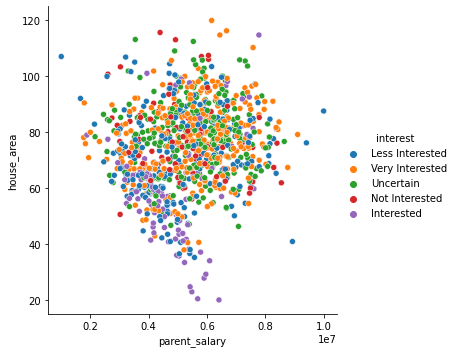

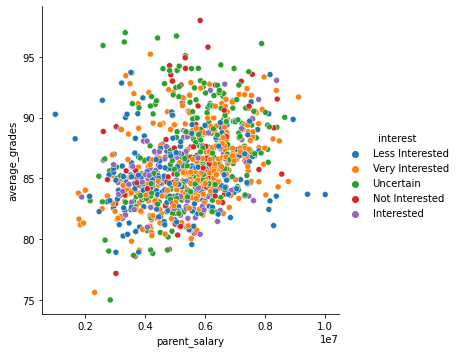

In [50]:
sns.relplot(x='parent_salary', y = 'house_area', hue = "interest", data = df)
sns.relplot(x='parent_salary', y = 'average_grades', hue = "interest", data = df)


Analyzing this graph using the interest variable, we can see that students who have a high house_area value are either not interested in or uncertain. Similarly, we can see that very high values ​​in the Average_Grades variable show students that are not very interested or uncertain.

Data distribution:

<AxesSubplot:xlabel='will_go_to_college', ylabel='count'>

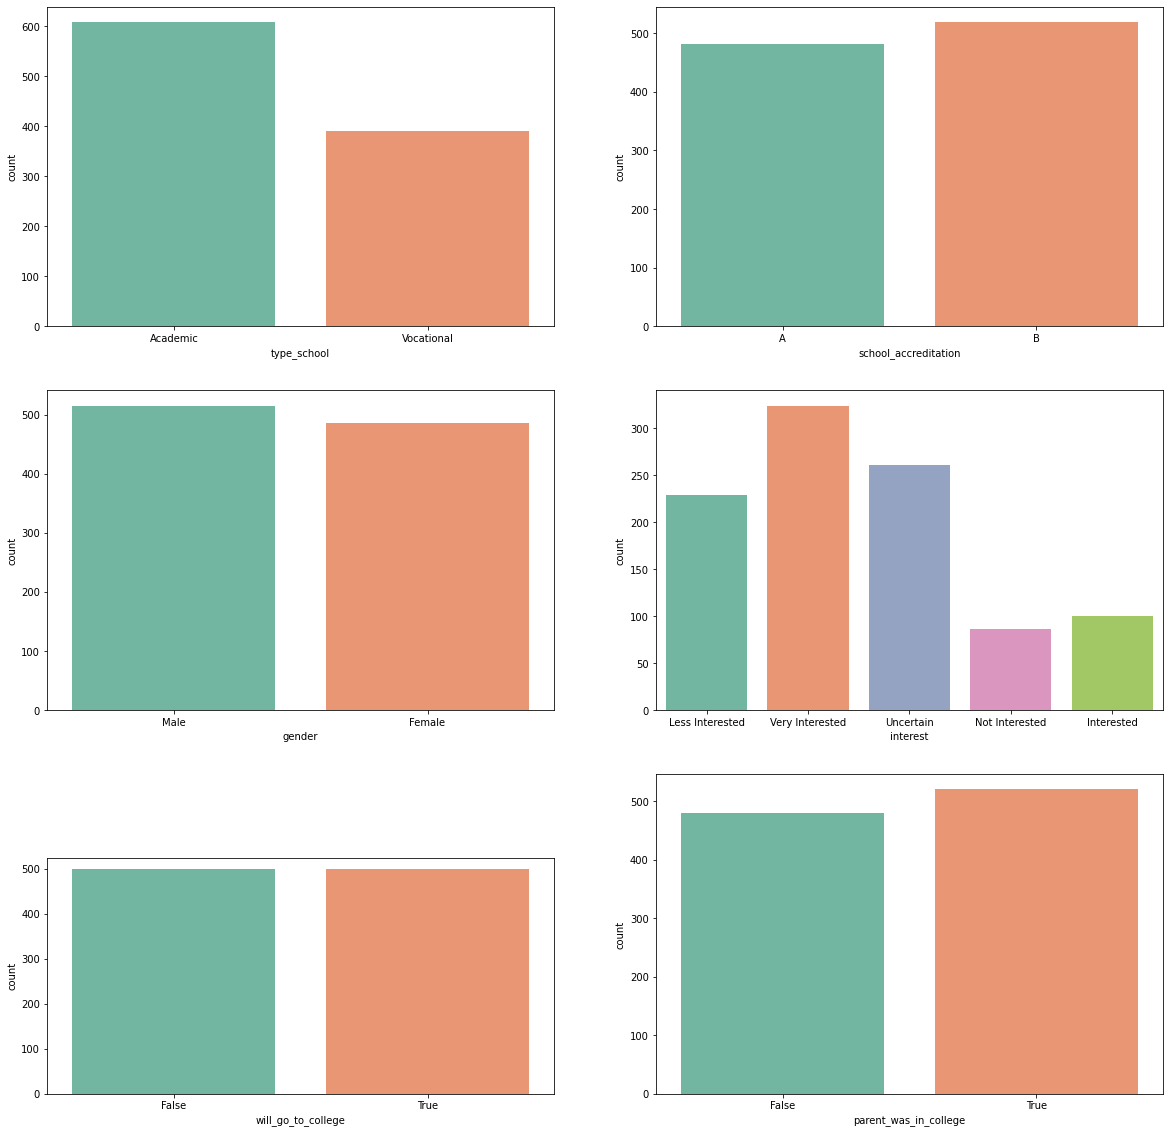

In [38]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'type_school', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'school_accreditation', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'gender', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'interest', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'residence', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'parent_was_in_college', palette='Set2', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'will_go_to_college', palette='Set2', data = df)


We can observe that the distribution in relation to the number of men and women is well balanced.

We can see a perfect balance in the data from the Will go to college chart

We can analyze that the data that show a more noticeable imbalance are the data referring to the type of school and the students' interest level. In the latter, we can see that a few students are really not interested or consider themselves interested.

Continuous Variables:

c:\Users\Rícharde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_grades'>

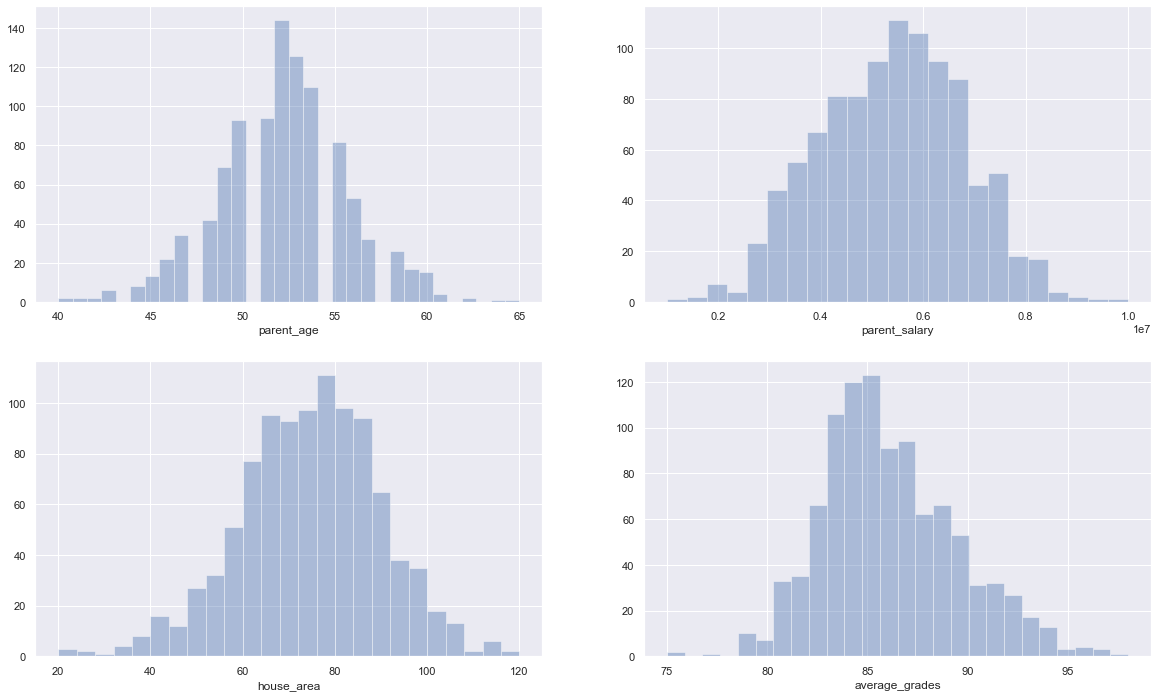

In [55]:

plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.distplot(df.parent_age, kde = False)

plt.subplot(4,2,2)
sns.distplot(df.parent_salary, kde = False)

plt.subplot(4,2,3)
sns.distplot(df.house_area, kde = False)

plt.subplot(4,2,4)
sns.distplot(df.average_grades, kde = False)

We can see from the 'parent_age' graph that most of the parents' ages are between 50-55 and we have no parents over 65 and under 40. The 'house_area' graph is practically a normal distribution showing that most houses have an area between 60 and 80. In 'average_grades' we can see that the scores are between 80 and 85 and the graph demonstrates a good distribution of the data. Similarly, the 'parent_salary' chart values ​​are mostly between 0.4 and 0.6 showing a good distribution of the data

Preprocessing:

Label transform

In [56]:
# label transform 
label_enconder = preprocessing.LabelEncoder()
df['type_school'] = label_enconder.fit_transform(df['type_school'])
df['school_accreditation'] = label_enconder.fit_transform(df['school_accreditation'])
df['gender'] = label_enconder.fit_transform(df['gender'])
df['interest'] = label_enconder.fit_transform(df['interest'])
df['residence'] = label_enconder.fit_transform(df['residence'])


In [57]:
df.dtypes

type_school                int32
school_accreditation       int32
gender                     int32
interest                   int32
residence                  int32
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
will_go_to_college          bool
dtype: object

Check duplicates

In [61]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   int32  
 1   school_accreditation   1000 non-null   int32  
 2   gender                 1000 non-null   int32  
 3   interest               1000 non-null   int32  
 4   residence              1000 non-null   int32  
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int32(5), int64(2)
memory usage: 60.5 KB


Building Models:


Separating into features variables and target variable

In [84]:
X = df.drop(['will_go_to_college'], axis=1).values
y = df.will_go_to_college.values

Using Nested Cross-Validation

<img src = "https://github.com/rasbt/stat451-machine-learning-fs20/raw/9e463e06a49278a3940774ef32def883e85e9cc0/L11/code/nested-cv-image.png">

Models Starting 

In [83]:
models = {}
models['kNN'] = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
models['Random Forest'] = RandomForestClassifier(n_estimators=250,random_state=42)
models['LR'] = LogisticRegression(random_state=42)
models['DT'] = DecisionTreeClassifier(random_state=42)
models['SVM'] = SVC(random_state=42)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Setting up the grid parameters

In [87]:
# Knn model
hyper_1 = {}
hyper_1 ['n_neighbors'] = [3,9,18,25,45,55]
hyper_1 ['leaf_size'] = [5,12,20,30]
hyper_1 ['algorithm'] = ['ball_tree','kd_tree','brute']

# Random Forest model
hyper_2 = {}
hyper_2 ['n_estimators'] = [10,50,200]
hyper_2 ['riterion'] = ['gini', 'entropy']
hyper_2 ['max_depth'] = [5,20,50,100]
hyper_2['classifier'] = [models['Random Forest']]

# SVM model
hyper_3 = {}
hyper_3 ['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]

# Decision Tree model
hyper_4 = {}
hyper_4['criterion'] = ['gini','entropy','log_loss']
hyper_4['splitter'] = ['best', 'random']
hyper_4['max_depth'] = [10,20,50,100]
hyper_4['min_samples_split'] = [2,5,10,15,25]


hyper_5 = {}
hyper_5 = [] = []
hyper_5 = [] = []
hyper_5 = [] = []

SyntaxError: invalid syntax (3535760226.py, line 25)